In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

import math
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

from itertools import cycle

%matplotlib inline

In [2]:
df = pd.read_csv("Database MiniPONS.csv", sep=';')
df["Type"] = df["Type"].astype("category")
df["Group"] = df["Group"].astype("category")

In [3]:
df.head()

,Group,Type,Age,Right_answers,Audio_prosody,Combined_channel,Face_video,Body_video,Positive_valence,Negative_valence,Dominant,Submissive
0,Bipolar,BD I,47,40,9,11,9,11,18,22,23,17
1,Bipolar,BD I,49,49,13,13,11,12,24,25,24,25
2,Bipolar,BD I,45,43,9,11,13,10,21,22,24,19
3,Bipolar,BD I,53,44,10,10,12,12,25,19,24,20
4,Bipolar,BD II,50,50,14,13,11,12,23,27,23,27


[Text(0,0.5,'Count'), Text(0.5,0,'Diagnosis')]

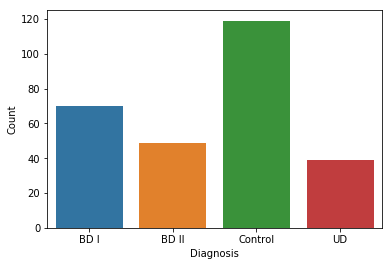

In [4]:
diagnosisplot = sns.countplot(df["Type"])
diagnosisplot.set(xlabel = "Diagnosis", ylabel = "Count")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Delbert\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


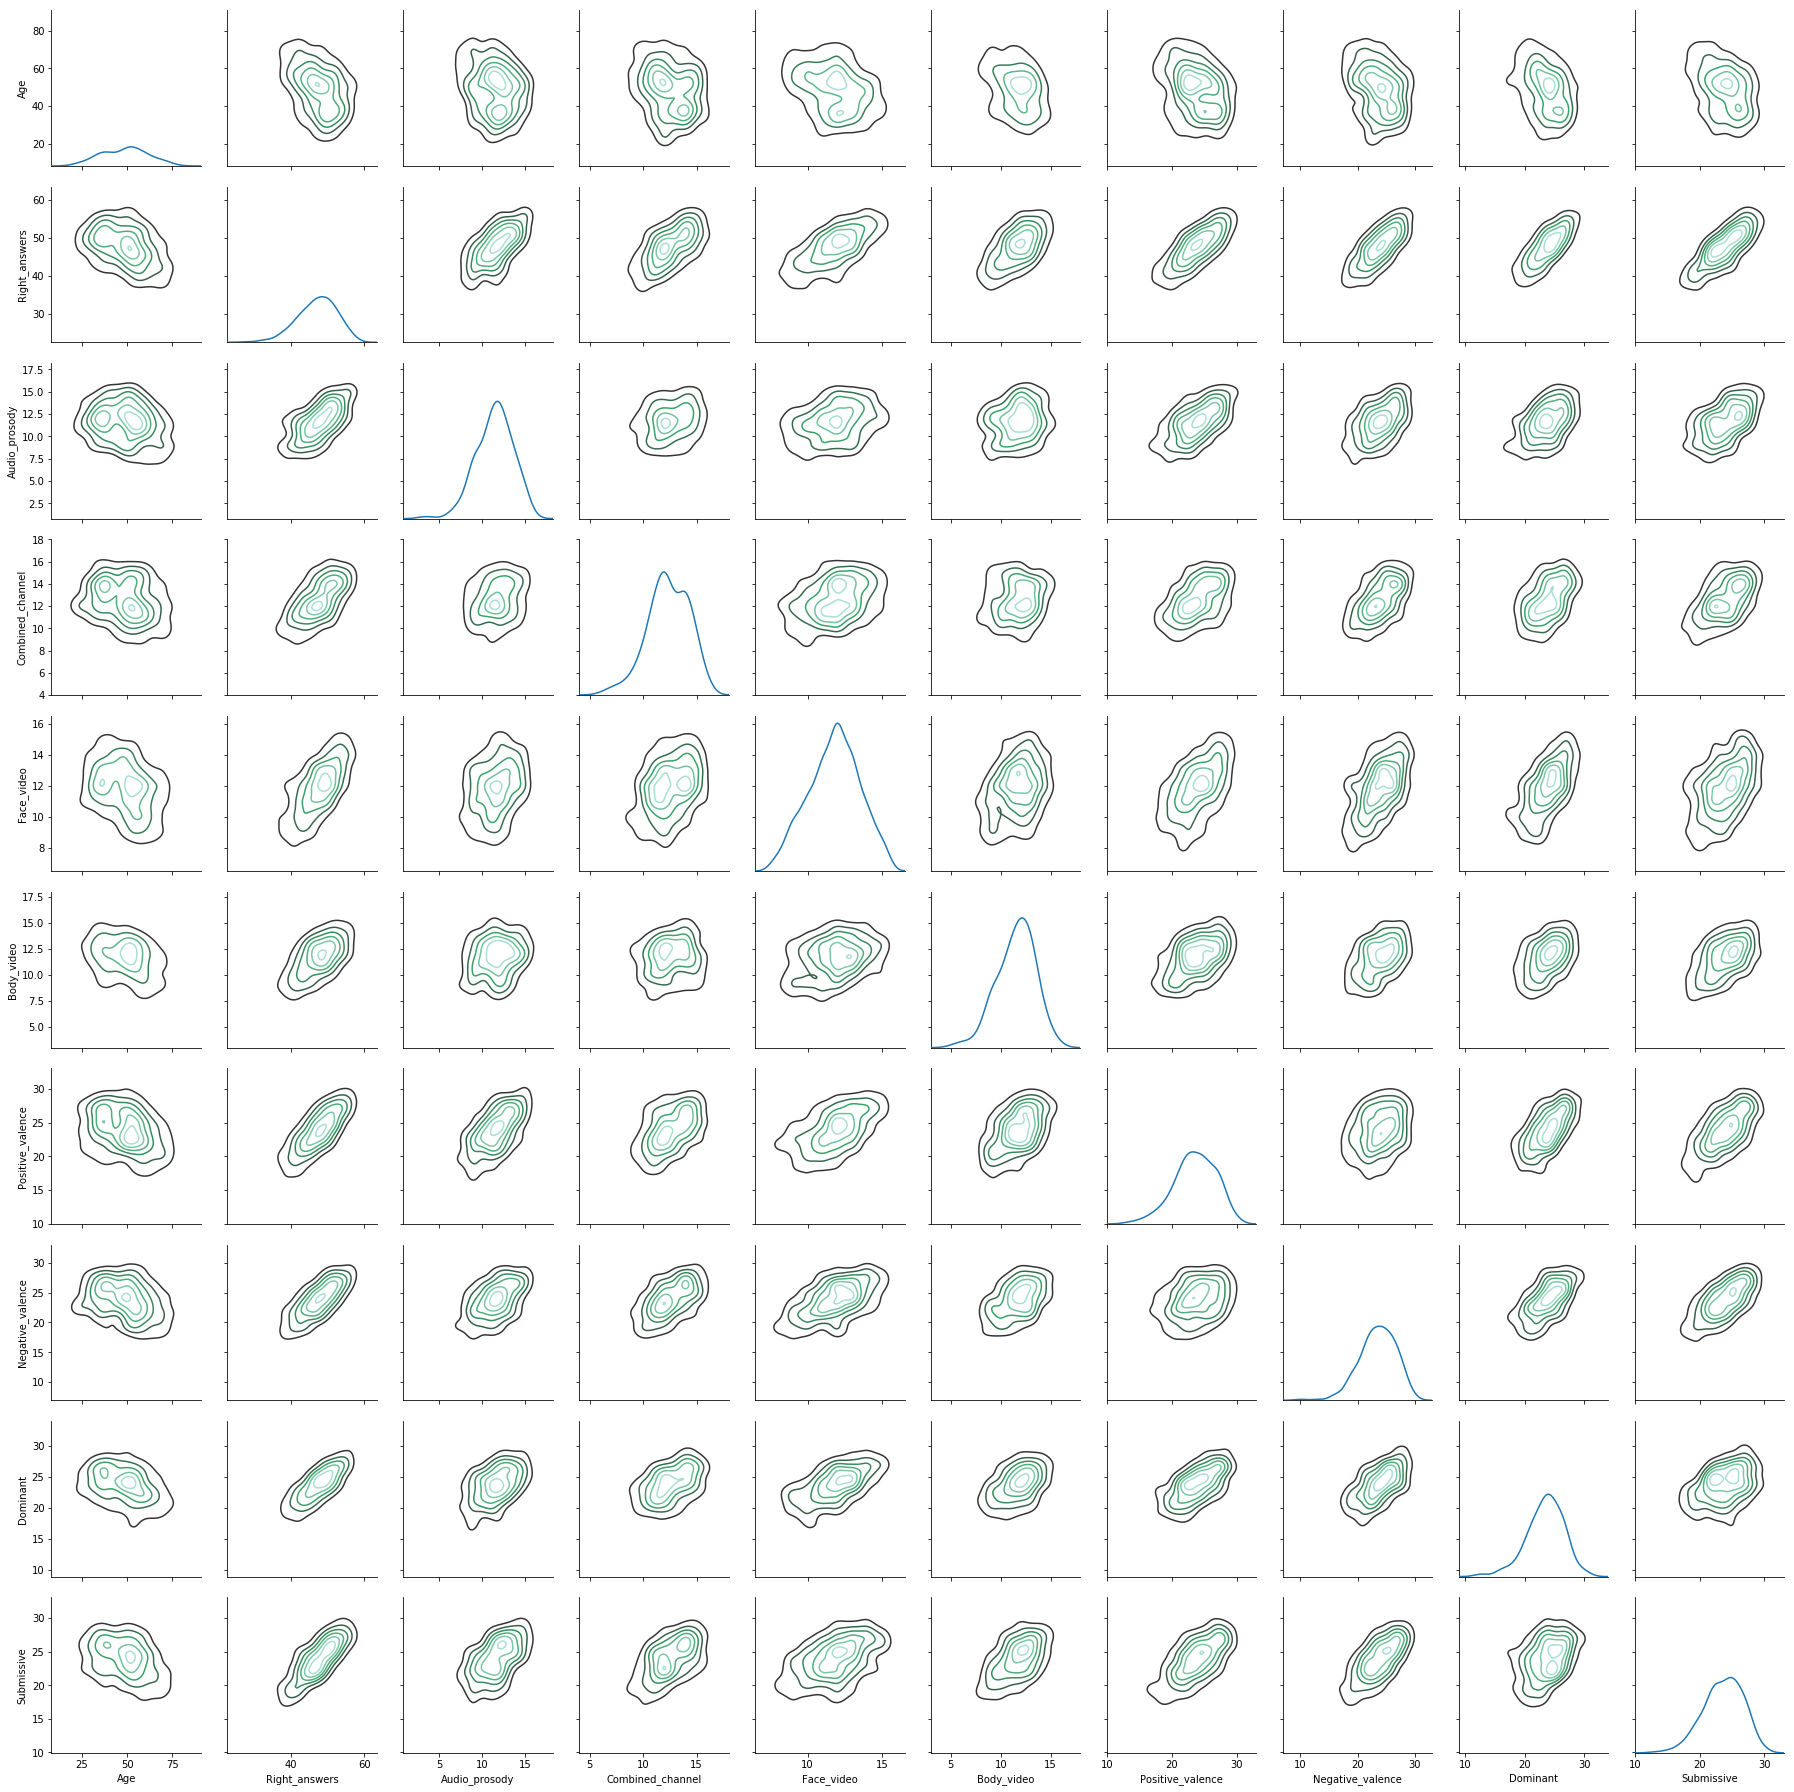

In [6]:
kdeplot = sns.PairGrid(df)
kdeplot.map_diag(sns.kdeplot)
kdeplot.map_offdiag(sns.kdeplot, n_levels = 6)

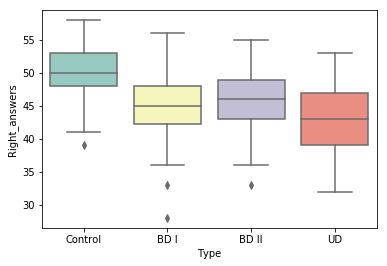

In [5]:
sns.boxplot(x = "Type", y = "Right_answers", data = df, 
            palette = "Set3", order = ["Control", "BD I", "BD II", "UD"])

In [6]:
mod = ols('Right_answers ~ Type', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

               sum_sq     df          F        PR(>F)
Type      2289.270038    3.0  39.567761  2.904653e-21
Residual  5264.982670  273.0        NaN           NaN


In [7]:
mc = MultiComparison(df["Right_answers"], df["Type"])
result = mc.tukeyhsd()

print(result)
print(mc.groupsunique)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
  BD I   BD II   0.5102   0.9   -1.6043  2.6247 False 
  BD I  Control  5.0924  0.001   3.3825  6.8024  True 
  BD I     UD   -2.4249  0.0309 -4.6933 -0.1565  True 
 BD II  Control  4.5822  0.001   2.6553  6.5092  True 
 BD II     UD   -2.9351  0.0109 -5.3712  -0.499  True 
Control    UD   -7.5173  0.001   -9.612 -5.4227  True 
------------------------------------------------------
['BD I' 'BD II' 'Control' 'UD']


In [8]:
def checkvariable(independent):
    mod = ols('%s ~ Type' %independent, data = df).fit()
    aov_table = sm.stats.anova_lm(mod, typ=2)
    print(aov_table)

In [9]:
for i in df.drop(["Group", "Type"], axis = 1).columns:
    print("\n\n" + i)
    print(checkvariable(i))



Age
                sum_sq     df         F        PR(>F)
Type      10020.196522    3.0  27.81873  9.962657e-16
Residual  32777.839579  273.0       NaN           NaN
None


Right_answers
               sum_sq     df          F        PR(>F)
Type      2289.270038    3.0  39.567761  2.904653e-21
Residual  5264.982670  273.0        NaN           NaN
None


Audio_prosody
               sum_sq     df         F        PR(>F)
Type       153.013115    3.0  12.76606  7.846232e-08
Residual  1090.719737  273.0       NaN           NaN
None


Combined_channel
              sum_sq     df          F        PR(>F)
Type      173.976353    3.0  18.492455  5.967577e-11
Residual  856.124730  273.0        NaN           NaN
None


Face_video
              sum_sq     df          F        PR(>F)
Type      116.415536    3.0  15.697906  1.904616e-09
Residual  674.855222  273.0        NaN           NaN
None


Body_video
              sum_sq     df          F        PR(>F)
Type      144.877600    3.0  15.254452

In [49]:
features = df.iloc[:, 2:]
labels = df.iloc[:, 1]

sc = StandardScaler()
scaled_features = sc.fit_transform(features)

lda = LDA(n_components = 2)
features_lda = lda.fit_transform(scaled_features, labels)

C:\Users\Delbert\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


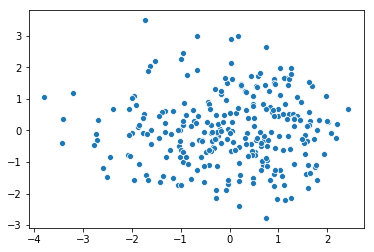

In [30]:
sns.scatterplot(x = features_lda[:,0], y = features_lda[:, 1])

In [51]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_features)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['Type']]], axis = 1)

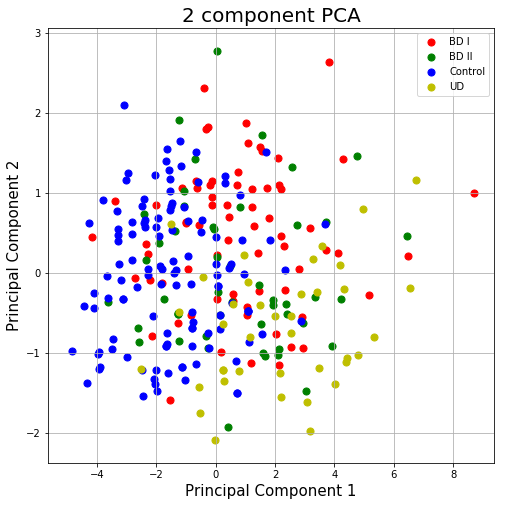

In [33]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['BD I', 'BD II', 'Control', 'UD']
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [169]:
le = LabelEncoder()
converted_labels = le.fit_transform(labels)
converted_labels = [str(i) for i in converted_labels]

X_train, X_test, y_train, y_test = train_test_split(features, converted_labels, test_size = 0.3, random_state = 42)

rf = RandomForestRegressor(n_estimators = 1000, random_state = 50)
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)
predictions = [round(i, 0) for i in predictions]
predictions = [int(i) for i in predictions]

confusion_matrix(y_test, [str(i) for i in predictions])


array([[ 3,  8, 12,  0],
       [ 0,  6,  7,  0],
       [ 2, 18, 15,  0],
       [ 0,  5,  7,  1]], dtype=int64)

In [175]:
bidf = df[df.Group != "UD"]

C:\Users\Delbert\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Delbert\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


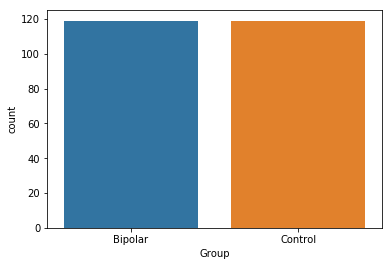

In [176]:
bidf["Group"] = bidf["Group"].astype(str)
bidf["Group"] = bidf["Group"].astype("category")
sns.countplot(bidf.Group)

In [180]:
bidf["Group"] = bidf["Group"].replace({"Bipolar": "0", "Control": "1"})

X_train, X_test, y_train, y_test = train_test_split(bidf.iloc[:, 2:], bidf.iloc[:, 0], test_size = 0.3, random_state = 42)

rf = RandomForestRegressor(n_estimators = 1000, random_state = 50)
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)
predictions = [round(i, 0) for i in predictions]
predictions = [int(i) for i in predictions]

confusion_matrix(y_test, [str(i) for i in predictions])

C:\Users\Delbert\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([[23, 12],
       [ 7, 30]], dtype=int64)

In [192]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state = 42)

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 7  7  9  0]
 [ 6  3  2  2]
 [13  4 18  0]
 [ 4  2  3  4]]
              precision    recall  f1-score   support

        BD I       0.23      0.30      0.26        23
       BD II       0.19      0.23      0.21        13
     Control       0.56      0.51      0.54        35
          UD       0.67      0.31      0.42        13

    accuracy                           0.38        84
   macro avg       0.41      0.34      0.36        84
weighted avg       0.43      0.38      0.39        84



In [205]:
X_train, X_test, y_train, y_test = train_test_split(features, df["Group"], test_size = 0.3, random_state = 42)

classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[29  6  1]
 [21 14  0]
 [10  0  3]]
              precision    recall  f1-score   support

     Bipolar       0.48      0.81      0.60        36
     Control       0.70      0.40      0.51        35
          UD       0.75      0.23      0.35        13

    accuracy                           0.55        84
   macro avg       0.64      0.48      0.49        84
weighted avg       0.61      0.55      0.53        84

